### Phase 3 Project Submission
* Students name: Jeniffer Njeri Gatharia
* Student pace: Part Time
* Instructor name: Samuel G Mwangi

# SyriaTel Customer Churn

## Project Overview

### 1. Business Understanding

Customer retention is at the heart of every thriving Telecom company. Managing and reducing customer churn is essential for maintaining revenue, profitability, and market share. By focusing on churn reduction, telecom companies can enhance customer satisfaction, increase the lifetime value of their customers, and secure a stronger position in the competitive market. SyriaTelecommunication is well aware of the common marketplace comment that "it is cheaper to retain a converted customer than acquire a new client. As a result, I have been tasked to build a classification model that will predict whether a customer will soon stop doing business with them. 

The research at hand delves into machine learning algorithms and offers recommendations tailored to the telecommunications industry. In a competitive telecom sector where customers can effortlessly switch from one provider to another, telecom companies are understandably concerned about customer retention and devising strategies to retain their clientele. By preemptively identifying customers likely to switch providers through behavioral analysis, they can devise targeted offers and services based on historical records. 

The core objective of this study is to predict churn in advance and pinpoint the primary factors that may influence customers to migrate to other telecom providers. The project will explore various machine learning algorithms, including logistic regression and decision trees to develop a robust churn prediction model. Model performance will be evaluated using metrics such as accuracy, precision, recall, and AUC-ROC to ensure the best possible outcomes. This will provide the insight the board members need when making policies and procedures that will enable the business gear towards retaining the customers and continue being relevant in the marketplace.

See below questions the project aims to answer:
1. What is the churn current % rate.
2. What are the factors contributing to customer churn.
3. What features/attributes do the customers who churn have.
4. What strategies can SyriaTel implement to increase customer retention.

### 2. Data Understanding

This project utilizes the SyriaTel dataset, which was downloaded from Kaggle. The data is stored in the file named SyriaTel_Customer_Churn.csv. As part of understanding our data, we will assess it for class imbalance and identify any other potential limitations. These issues will be addressed as we proceed to analyze and prepare the data for modeling.

See below columns and what they represent:
* State: The geographical location of the customer.
* Account Length: How long the customer held their account.
* Area Code: Customer's phone number area code.
* Phone Number: Customer's mobile number.
* International Plan: A indicator of whether the customer has an international plan or not.
* Voice Mail Plan: An indicator whether the customer has a voice mail plan.
* Number Vmail Messages: How many voicemail messages the customer has.
* Total Day Minutes: Total minutes the customers spend on a call in the day.
* Total Day Calls: Total number of calls the customer made in a day.
* Total Day Charge: Total charge incrued for the day calls.
* Total Eve Minutes: Total minutes the customers spend on a call in the evening.
* Total Eve Calls: Total number of calls the customer made in a evening.
* Total Eve Charge: Total charge incrued for the evening calls
* Total Night Minutes: Total minutes the customers spend on a call in the night.
* Total Night Calls: Total number of calls the customer made in a night.
* Total Night Charge: Total charge incrued for the day night.
* Total Intl Minutes: Total minutes spent on an international call.
* Total Intl Calls: Total international calls made.
* Total Intl Charge: Total charge incured on the international plan.
* Customer Service Calls: How many calls the customer made for support to SyriaTel.
* Churn: Target variable indicating whether the customer has churned or not that is 1 or 0 respectively.

All the other features are potential contributing factors to churn which our project will focus on to eventually tell which features are more significant than the others. 



### 3. Data Preparation 
#### Import relevant libraries

In [168]:
import pandas as pd
import numpy as np
#libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn import tree
import warnings


#### Data Overview

In [169]:
# Load the data and view the first 5 rows
customer_churn = pd.read_csv('SyriaTel_Customer_Churn.csv')
customer_churn.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [170]:
# To check the Shape of the dataset
customer_churn.shape

(3333, 21)

In [171]:
#To check the column names
customer_churn.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

* We note the dataset has 3333 rows and 21 columns

In [172]:
# To view the dataset info
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

* From the information seen above we note the dtypes of the various columns bool(1), float64(8), int64(8) and object(4)
* We also note that we do not have any missing values here from the non-null count.
* It is appropriate for the area code to be in the datatype object than the int64. We shall convert this then do a descriptive statistics.

In [173]:
# Convert the 'area code' column to an object (string) column
customer_churn['area code'] = customer_churn['area code'].astype(str)

* The values the 'area code' column contains are essentially placeholders or labels, not numerical values that carry mathematical significance. To prevent potential interference with our predictive modeling process, we have undertaken the step of converting this column to a string data type. By doing so, we ensure that the 'area code' column is treated as a categorical variable with no numerical significance. This transformation aids in maintaining the integrity of our predictive model, especially when the model relies on numerical inputs, preventing any misinterpretation of the 'area code' as a quantitative feature

In [174]:
#To view the descriptive statistic of the dataset
customer_churn.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### To check for missing values

In [175]:
#To check for missing values
customer_churn.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

* This is just another step where we confirm that the dataset has no missing values.

In [176]:
#To check for unique values in our dataset
customer_churn.nunique()


state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

* We view the unique values and classes in our dataset. We have 3 area codes, 2 international and voice mail plans. The phone number valuse can be used in this case as the unique identifier in our dataset

In [177]:
#To check for duplicated values
customer_churn.duplicated().sum()

0

* We have 0 duplicates in this dataset

#### Target variable class distribution

False    2850
True      483
Name: churn, dtype: int64


False    85.508551
True     14.491449
Name: churn, dtype: float64


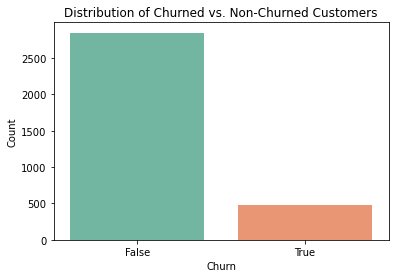

In [178]:
class_distribution = customer_churn['churn'].value_counts()
print(class_distribution)

print('\n')
#To view the % distribution      
class_distribution = customer_churn['churn'].value_counts(normalize=True) * 100
print(class_distribution)

#Visualization of the Churned Vs. Non-Churned Customers
sns.countplot(x='churn', data=customer_churn, palette='Set2')
plt.title('Distribution of Churned vs. Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

* From the target variable above we see that the churn class value count is 483 whereas the no churn count is 2850. We note a significant class imbalance here where the churn is the minority class and not churn is the majority class. This is common in churn datasets.

* 85.5% customer did not churn while 14.5% customers churned. The imbalance means that a model trained without addressing this issue will be biased toward predicting the majority class (customers not churning). This will lead to high accuracy but poor performance in identifying actual churners.

* We will address class imbalance using a technique such as SMOTE before modeling to balance the 'churn' and 'not churn' classes. This should help improve overall model metrics like Precision, Recall, F1-score, and AUC-ROC. In imbalanced datasets, a model may achieve high accuracy by being biased toward the majority class, but this metric alone would be misleading and not truly reflective of the model's performance on the minority class which is what our model is meant to predict

#### Feature Relationships

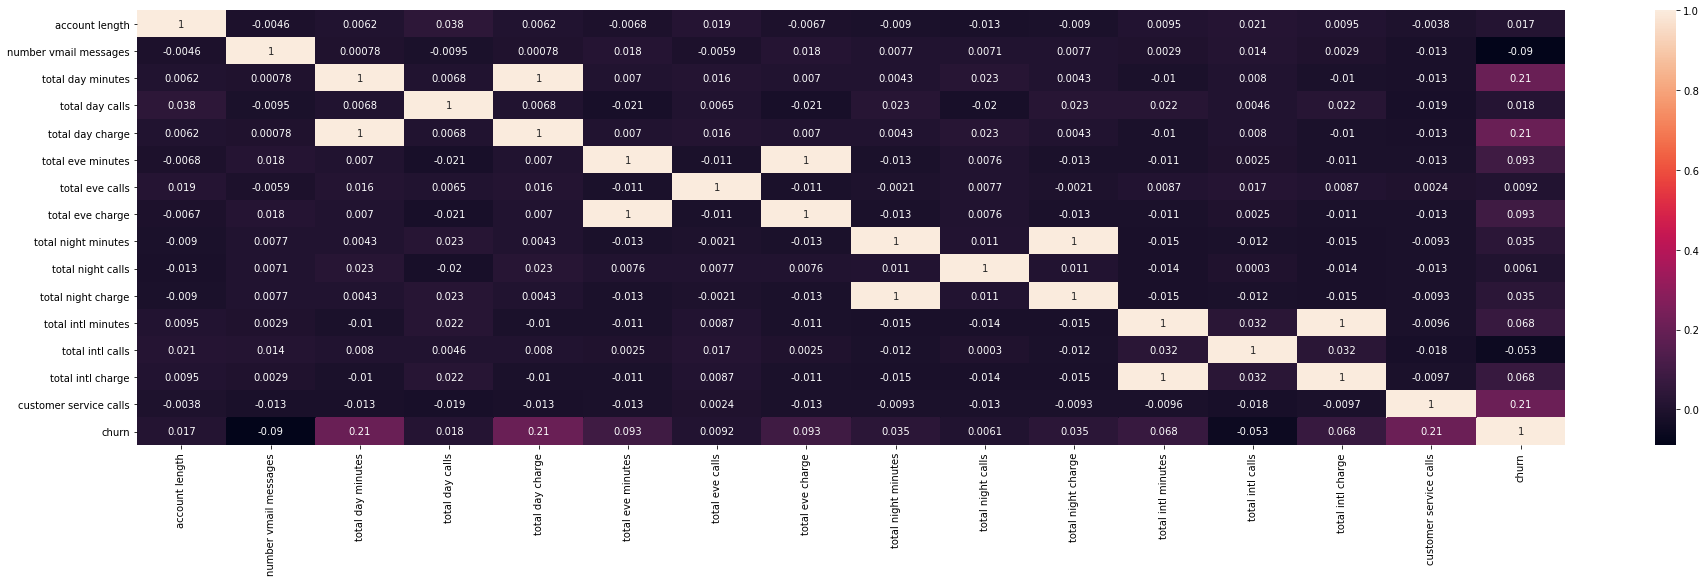

In [179]:
plt.rcParams['figure.figsize'] = (32, 8)  
sns.heatmap(customer_churn.corr(), annot=True)
plt.show()

* Our examination of the heatmap representation of the data revealed that several columns exhibit high levels of correlation with each other. For instance 'total day charge', 'total day minutes', 'total eve minutes', 'total eve charge', 'total night charge', 'total night minutes', 'total int minutes' and 'total int charge' have perfect multicollinearity. This is a condition where independent variables in our dataset are highly interrelated. Multicollinearity can make it challenging to discern the unique impact of each independent variable on the dependent variable in our modeling. This issue has the potential to create overfitting problems, particularly when employing Logistic Regression, as this method is sensitive to multicollinearity.

* To address this concern, it will be crucial to take specific steps to handle multicollinearity in our modeling process. These steps might involve employing techniques such as feature selection, dimensionality reduction, or regularization to mitigate the adverse effects of multicollinearity. By doing so, we can enhance the reliability and interpretability of our models and ensure that they provide accurate insights into the relationships between our independent and dependent variables.

#### Histogram to view the distribution of the numerical features

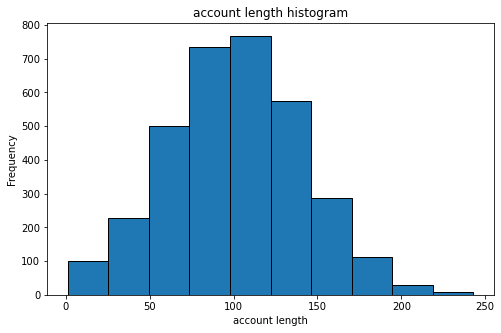

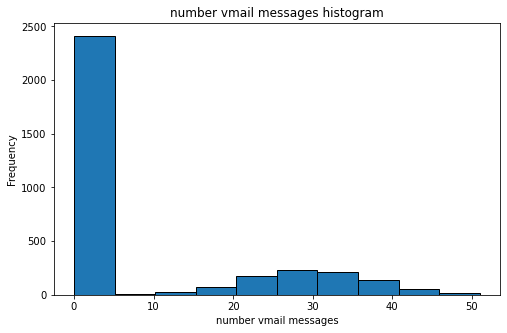

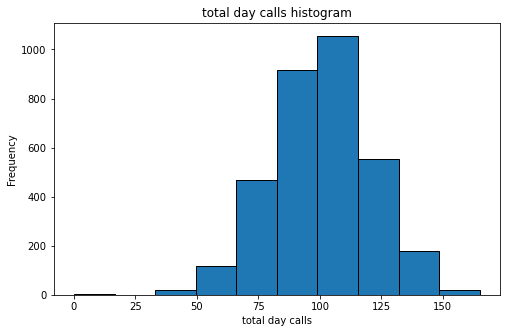

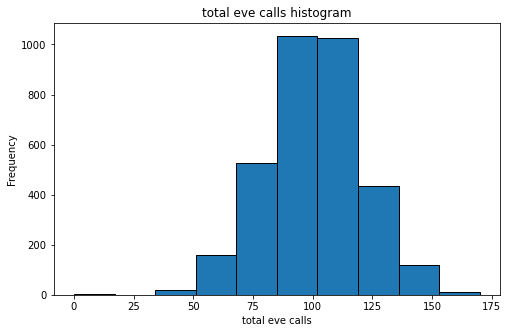

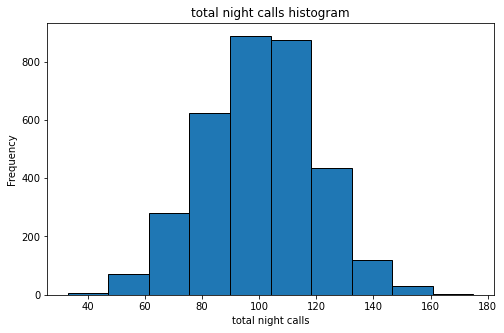

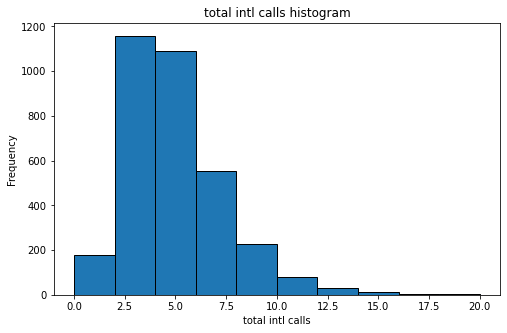

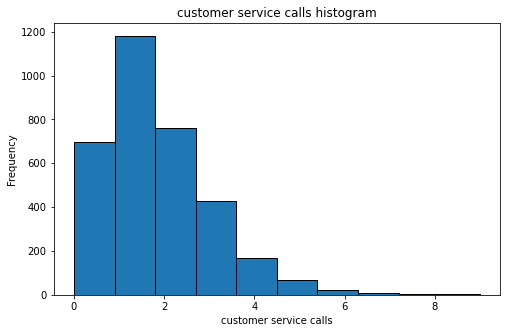

In [180]:
# Plot Histograms for numerical features to visualize their distribution
numerical_features = customer_churn.select_dtypes('int64', 'float64')
for feature in numerical_features:
    plt.figure(figsize=(8, 5))  # Set the figure size
    plt.hist(customer_churn[feature], bins=10, edgecolor='k', )  # Customize the number of bins
    plt.title(f'{feature} histogram')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

#### Outlier Visualization 

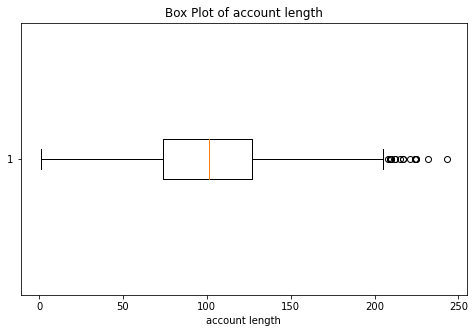

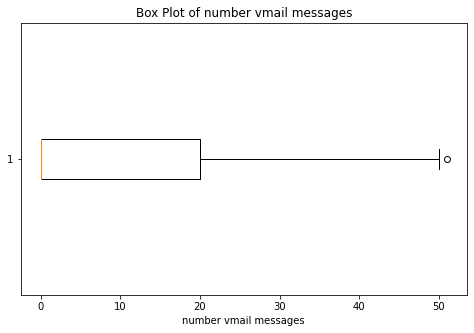

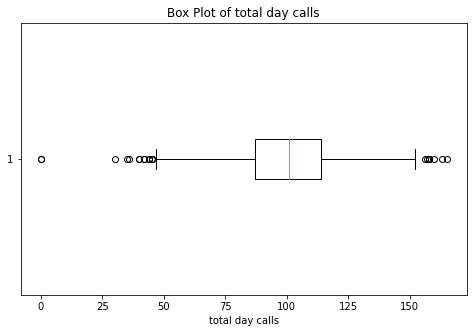

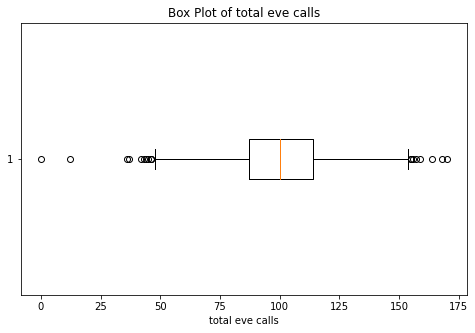

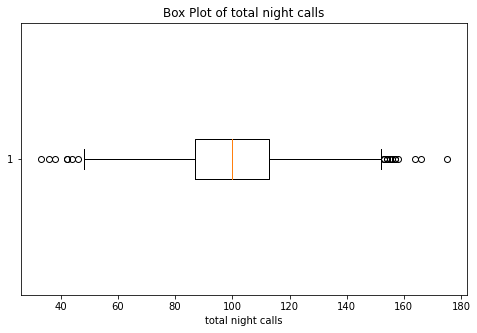

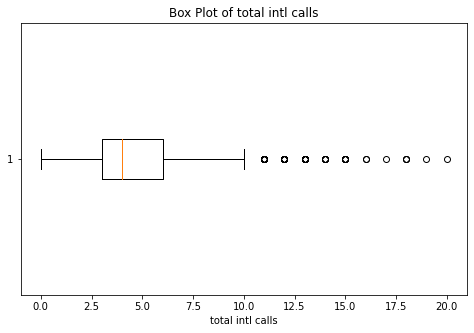

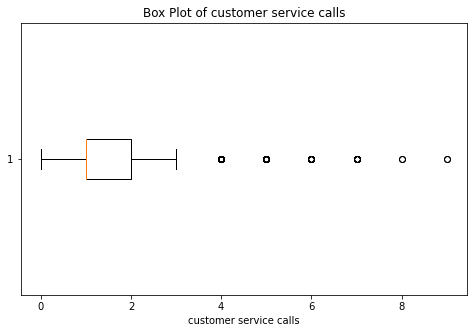

In [181]:
# Box plots to identify outliers and visualize the spread of data.
numerical_features = customer_churn.select_dtypes('int64', 'float64')
for feature in numerical_features:
    plt.figure(figsize=(8, 5))  # Set the figure size
    plt.boxplot(customer_churn[feature], vert=False)  # Create a horizontal box plot
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

* We observe the presence of a significant number of outliers in our dataset. Outliers have the potential to impact our modeling process. However, it is important to note that, in this case, these outliers are not anomalies that should be removed. Instead, they are a noteworthy aspect of our dataset that we should be aware of during our modeling process. These outliers may carry valuable information or insights that could be relevant to our analysis therefore it is essential to consider and account for them when developing our models and interpreting the results. Understanding the nature and impact of these outliers is a critical part of ensuring the robustness and accuracy of our data analysis.

* Adding regularization to our model can help reduce the impact of outliers by penalizing extreme parameter values, making the model more generalizable and robust



### 4. Data Preprocessing

####  Data Splitting 
We perform this step before preprocessing in order to prevent data leakage. This ensures that the test data remains completely unseen until the evaluation phase. Use the random state of 42 and a test size of 20%.

In [240]:
#Establish the X and y variables 
X = customer_churn.drop(['churn', 'state', 'area code', 'phone number'], axis=1) 
y = customer_churn['churn']
#Train test split using the random_state as 42 and test_size as 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


We have created the X and y variables. The y variable is the target variable. The X variable consists of all the features apart from the three indicated below: Why drop these columns:

* 'phone number' serves as a unique identifier for customers but is unlikely to be a predictive feature for churn.

* Including 'state' as a feature in a churn prediction model can introduce challenges. If treated as a categorical feature, it can lead to a high number of dummy variables (one-hot encoding) or require specific encoding strategies, potentially increasing the dimensionality of the dataset.

* 'area code' - This is less likely to have a direct impact on churn. It is typically an identifier and may not be a strong predictor.

#### Handling Missing Data
We do not have missing data therefore there isnt much to handle here in this preprocessing step.

#### Encoding Categorical Variables

In [241]:
#To check for the categorical variables
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 817 to 3174
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          2666 non-null   int64  
 1   international plan      2666 non-null   object 
 2   voice mail plan         2666 non-null   object 
 3   number vmail messages   2666 non-null   int64  
 4   total day minutes       2666 non-null   float64
 5   total day calls         2666 non-null   int64  
 6   total day charge        2666 non-null   float64
 7   total eve minutes       2666 non-null   float64
 8   total eve calls         2666 non-null   int64  
 9   total eve charge        2666 non-null   float64
 10  total night minutes     2666 non-null   float64
 11  total night calls       2666 non-null   int64  
 12  total night charge      2666 non-null   float64
 13  total intl minutes      2666 non-null   float64
 14  total intl calls        2666 non-null 

* We have 2 features that are in the datatype object. We shall proceed to convert this variables to dummy ohe using the OneHotEncoder from sklearn.

In [244]:
#Select the objects dtypes
X_train_cat = X_train.select_dtypes(include=[object]).copy()

#Instatialize OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop=None) #Drop none since we have only 2 dummy variables
#To fit the categorical datatype
ohe.fit(X_train_cat)
# Transform the categorical columns
X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_cat),
    index=X_train_cat.index,
    columns=ohe.get_feature_names_out(X_train_cat.columns)
)
# Select categorical columns from the test data
X_test_cat = X_test.select_dtypes(include=[object]).copy()

# Transform the test data using the already fitted encoder
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_cat),
    index=X_test_cat.index,
    columns=ohe.get_feature_names_out(X_test_cat.columns)
)
X_train_ohe.head()

,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
817,1.0,0.0,1.0,0.0
1373,1.0,0.0,1.0,0.0
679,0.0,1.0,1.0,0.0
56,1.0,0.0,1.0,0.0
1993,1.0,0.0,1.0,0.0


#### Data Normalization using MinMaxScaler 
MinMaxScaler with default parameters will create a maximum value of 1 and a minimum value of 0. This will work well with our binary one-hot encoded data.

In [246]:
#Selecte the numerical data from X_train
X_train_num = X_train.select_dtypes(exclude=[object]).copy()
#Initialize MinMaxScalerScaler
scaler = MinMaxScaler()
scaler.fit(X_train_num)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_num),
    # index is important to ensure we can concatenate with other columns
    index=X_train_num.index,
    columns=X_train_num.columns
)
#Selecte the numerical data from X_test data
X_test_num = X_test.select_dtypes(exclude=[object]).copy()
# Transform the test data using the already fitted Scaler
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_num),
    # index is important to ensure we can concatenate with other columns
    index=X_test_num.index,
    columns=X_test_num.columns
)
X_test_scaled.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
438,0.462810,0.0,0.437679,0.466667,0.437669,0.908991,0.623529,0.909091,0.447015,0.633803,0.447101,0.675,0.157895,0.675926,0.111111
2674,0.272727,0.0,0.305859,0.644444,0.305912,0.597745,0.729412,0.597865,0.444325,0.760563,0.444710,0.640,0.315789,0.640741,0.000000
1345,0.400826,0.0,-0.007467,-0.222222,-0.007432,0.438823,0.764706,0.439016,0.387036,0.387324,0.387328,0.340,0.052632,0.340741,0.444444
1957,0.603306,0.0,0.603676,0.362963,0.603716,0.561177,0.535294,0.561307,0.357719,0.563380,0.358039,0.510,0.105263,0.509259,0.111111
2148,0.392562,0.0,0.406088,0.533333,0.406081,0.617817,0.429412,0.617923,0.550027,0.408451,0.550508,0.500,0.368421,0.500000,0.111111


#### Concatenating the Normalized and OheHotEncoded Train Data


In [247]:
# Concatenate the one-hot encoded categorical columns with the numerical columns
X_train_final = pd.concat([X_train_scaled, X_train_ohe], axis=1)

# Display the final DataFrame
X_train_final

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
817,1.000000,0.000000,0.266801,0.459259,0.266892,0.450096,0.370588,0.450016,0.648198,0.598592,0.648536,0.330,0.315789,0.329630,0.222222,1.0,0.0,1.0,0.0
1373,0.442149,0.000000,0.314187,0.555556,0.314189,0.532582,0.647059,0.532514,0.499462,0.422535,0.499701,0.205,0.210526,0.205556,0.444444,1.0,0.0,1.0,0.0
679,0.305785,0.000000,0.631246,0.355556,0.631250,0.899093,0.652941,0.899385,0.497041,0.500000,0.497310,0.435,0.473684,0.435185,0.111111,0.0,1.0,1.0,0.0
56,0.578512,0.000000,0.356979,0.503704,0.356926,0.494913,0.364706,0.494985,0.316299,0.669014,0.316796,0.400,0.105263,0.400000,0.111111,1.0,0.0,1.0,0.0
1993,0.351240,0.000000,0.613728,0.488889,0.613682,0.732197,0.452941,0.732449,0.513179,0.542254,0.513449,0.225,0.157895,0.225926,0.000000,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.433884,0.000000,0.780586,0.666667,0.780574,0.546054,0.482353,0.546102,0.370091,0.204225,0.370592,0.300,0.157895,0.300000,0.111111,1.0,0.0,1.0,0.0
1130,0.500000,0.000000,0.093337,0.237037,0.093412,0.497113,0.523529,0.497250,0.614309,0.176056,0.614465,0.635,0.105263,0.635185,0.111111,1.0,0.0,1.0,0.0
1294,0.268595,0.000000,0.244113,0.340741,0.244088,0.720374,0.652941,0.720479,0.434104,0.647887,0.434549,0.460,0.263158,0.459259,0.111111,1.0,0.0,1.0,0.0
860,0.694215,0.000000,0.507180,0.600000,0.507095,0.481716,0.764706,0.481721,0.552448,0.415493,0.552899,0.495,0.315789,0.494444,0.222222,1.0,0.0,1.0,0.0


#### Concatenating the Normalized and OheHotEncoded Test Data


In [248]:
# Concatenate the one-hot encoded categorical columns with the numerical columns
X_test_final = pd.concat([X_test_scaled, X_test_ohe], axis=1)

# Display the final DataFrame
X_test_final

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
438,0.462810,0.000000,0.437679,0.466667,0.437669,0.908991,0.623529,0.909091,0.447015,0.633803,0.447101,0.675,0.157895,0.675926,0.111111,1.0,0.0,1.0,0.0
2674,0.272727,0.000000,0.305859,0.644444,0.305912,0.597745,0.729412,0.597865,0.444325,0.760563,0.444710,0.640,0.315789,0.640741,0.000000,1.0,0.0,1.0,0.0
1345,0.400826,0.000000,-0.007467,-0.222222,-0.007432,0.438823,0.764706,0.439016,0.387036,0.387324,0.387328,0.340,0.052632,0.340741,0.444444,1.0,0.0,1.0,0.0
1957,0.603306,0.000000,0.603676,0.362963,0.603716,0.561177,0.535294,0.561307,0.357719,0.563380,0.358039,0.510,0.105263,0.509259,0.111111,1.0,0.0,1.0,0.0
2148,0.392562,0.000000,0.406088,0.533333,0.406081,0.617817,0.429412,0.617923,0.550027,0.408451,0.550508,0.500,0.368421,0.500000,0.111111,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,0.644628,0.000000,0.524124,0.459259,0.524155,0.585648,0.500000,0.585895,0.465035,0.366197,0.465033,0.425,0.263158,0.425926,0.222222,1.0,0.0,1.0,0.0
2763,0.475207,0.372549,0.439690,0.548148,0.439696,0.509761,0.694118,0.509867,0.455890,0.584507,0.456067,0.410,0.105263,0.409259,0.333333,1.0,0.0,0.0,1.0
3069,0.607438,0.509804,0.448306,0.451852,0.448311,0.441298,0.747059,0.441281,0.524744,0.387324,0.524806,0.495,0.157895,0.494444,0.111111,1.0,0.0,0.0,1.0
1468,0.305785,0.529412,0.329983,0.533333,0.330068,0.568600,0.747059,0.568748,0.460463,0.570423,0.460849,0.210,0.368421,0.209259,0.333333,1.0,0.0,0.0,1.0


#### Feature Selection Using Domain Knowledge

* Our model will have the following selected features:

**Relevant Features**
* account length: Longer account length might indicate higher customer satisfaction and loyalty which would reduce the churn.
* international plan: Customers with an international plan may have different churn behaviors compared to those without it.
* voice mail plan: This feature can indicate how much customers are engaged with additional services. It can impact retention if customers value these features.
* number vmail messages: The number of voicemail messages can indicate the level of engagement with the service. Higher engagement may be associated with lower churn.
* total day minutes, total day calls, total day charge: Daytime usage patterns can provide insights into customer behavior and satisfaction. High usage might correlate with higher satisfaction.
* total eve minutes, total eve calls, total eve charge: Evening usage patterns can also be indicative of customer preferences.
* total night minutes, total night calls, total night charge: Nighttime usage may indicate different customer preferences or patterns.
* total intl minutes, total intl calls, total intl charge: International usage can reflect a customer's dependence on the telecom service for international communication, impacting churn.
* customer service calls: The number of calls to customer service is often a strong indicator of customer dissatisfaction or issues. Higher numbers of service calls can be associated with higher churn risk.

**Less Relevant Features**:
* state: This might not directly affect churn unless there are significant regional differences in service quality or customer behavior. It might be useful if combined with other features.
* area code: This might be less directly relevant unless there are specific patterns of churn related to geographic areas. However, it could potentially provide regional context if combined with other features.
* phone number: This is a unique identifier and does not contribute to the prediction of churn.

### 5. Model Selection
We will proceed with **Logistic Regression** since this is a classification problem with a binary target variable. However, we will account for the class imbalance observed earlier to ensure that the model performs well across both classes. The technique that we will use to account for the imbalance is SMOTE which will be discussed as we proceed.

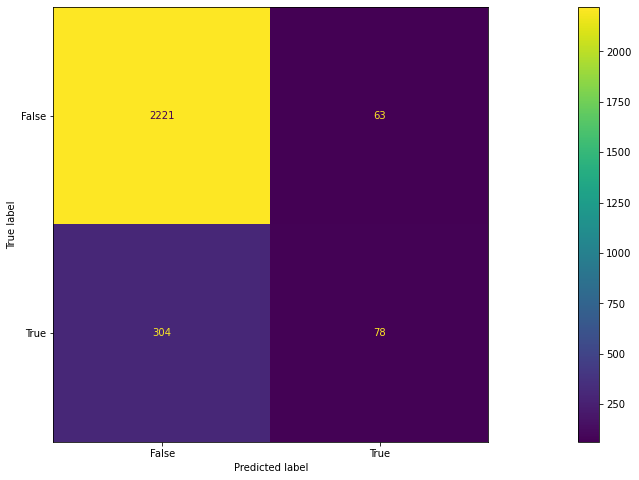

In [251]:
# Instantiate the model
baseline_model = LogisticRegression(fit_intercept=False, C=1e12, random_state=42, solver='liblinear')
# Fit the model on the scaled data
baseline_model.fit(X_train_final, y_train)
#To view the classifier Performance
ConfusionMatrixDisplay.from_estimator(estimator=baseline_model, X=X_train_final, y=y_train);

See interpretation from the confusion matrix generated before SMOTE

* True Positive: 78 Customers who would churn and predicted as positive

* False Negative: 304 Customers who would churn and predicted as negative

* False Positive: 63 Customers who would not churn and predicted as positive

* True Negative: 2221 Customers who would not churn and predicted as negative

#### Model Training Before Fixing Class Imbalance

In [268]:
#Predict the y_trained data from the X_trained final set
y_hat_train = baseline_model.predict(X_train_final)
#Calculate the classification metrics
model_accuracy = accuracy_score(y_train, y_hat_train) *100
model_recall = recall_score(y_train, y_hat_train) *100
model_precision = precision_score(y_train, y_hat_train) *100
model_f1 = f1_score(y_train, y_hat_train) *100
#print the metrics
print(f'Baseline Training Accuracy: {model_accuracy}')
print(f'Baseline Training Recall: {model_recall}')
print(f'Baseline Training Precision: {model_precision}')
print(f'Baseline Training F1_score: {model_f1}')

#Predict the y_trained data from the X_trained final set
y_hat_test = baseline_model.predict(X_test_final)
#Calculate the classification metrics
model_accuracy = accuracy_score(y_test, y_hat_test) *100
model_recall = recall_score(y_test, y_hat_test) *100
model_precision = precision_score(y_test, y_hat_test) *100
model_f1 = f1_score(y_test, y_hat_test) *100

print('\n')
#print the metrics
print(f'Baseline Testing Accuracy: {model_accuracy}')
print(f'Baseline Testing Recall: {model_recall}')
print(f'Baseline Testing Precision: {model_precision}')
print(f'Baseline Testing F1_score: {model_f1}')

# Let's calculate the probability scores of each of the datapoints:
y_score = baseline_model.fit(X_train_final, y_train).decision_function(X_test_final)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
# Calculate the AUC score
roc_auc_ = roc_auc_score(y_test, y_score)
#Print the ROC AUC Score
print(f"ROC AUC Score: {roc_auc_}")

Baseline Training Accuracy: 86.23405851462866
Baseline Training Recall: 20.418848167539267
Baseline Training Precision: 55.319148936170215
Baseline Training F1_score: 29.82791586998088


Baseline Testing Accuracy: 85.6071964017991
Baseline Testing Recall: 17.82178217821782
Baseline Testing Precision: 58.06451612903226
Baseline Testing F1_score: 27.27272727272727
ROC AUC Score: 0.8332750236154357


* Baseline Accuracy: 86.23% This relatively high accuracy is misleading as we noted class imbalance in the dataset. The no churn is the majority class leading to high accuracy but poor performance on the minority class which is what we are interested in.

* Baseline Recall: 20.41% A low recall indicates that the model is missing a large portion of the actual positive cases. This is often the result of class imbalance.

* Baseline Precision: 55.32% Precision is relatively higher than recall, suggesting that when the model does predict a positive class, it is more often correct. However, the model still has a significant number of false positives, which lowers precision.

* Baseline F1 Score: 29.83 The low F1 score reflects the trade-off between the low recall and moderate precision. It shows that the model struggles to make accurate predictions for the minority class

* Baseline Testing Accuracy: 85.61% The testing accuracy is slightly lower than the training accuracy, which suggests that the model is somewhat overfitting to the training data. However, like the training accuracy, this metric might be misleading due to class imbalance.

* Baseline Testing Recall: 17.82% The recall on the testing data is even lower than on the training data (15.84% vs. 19.90%), indicating that the model is failing to generalize well in identifying churn cases. This suggests the model is likely overfitting to the majority class in the training data and not learning the patterns needed to predict churn effectively.

* Baseline Testing Precision: 58.06% The testing precision is close to the training precision, which means that among the cases the model predicts as churn, the proportion of correct predictions remains similar. However, since recall is very low, this isn't particularly comforting

* Baseline Testing F1 Score: 27.27% The F1 score has dropped further on the test data, which suggests that the model's overall performance on unseen data is quite poor. This is likely due to the imbalance in the dataset and the model's inability to generalize

* ROC AUC Score: 0.8332750236154357 This is the key metric for evaluating the performance of a classification model especially in cases of class imbalance. 


#### Handling Class Imbalance
The majority of the data (about 85.51%) falls into the 'False' or 0 category, while the minority of the data (about 14.49%) falls into the 'True' or 1 category. This indicates that the dataset is imbalanced, with a higher proportion of non-churned customers. To address this issue, we will use SMOTE (Synthetic Minority Over-sampling Technique). SMOTE increases the number of instances in the minority class by generating synthetic examples rather than simply duplicating existing ones, which helps balance the dataset and improve model performance.

In [259]:
#Instantialize the technique
smote = SMOTE()
X_train_resampled, y_train_resampled  = smote.fit_resample(X_train_final, y_train)
#print to view the distribution
print('Synthetic Sample Class Distribution:')
print(pd.Series(y_train_resampled).value_counts())

Synthetic Sample Class Distribution:
True     2284
False    2284
Name: churn, dtype: int64


* Now the churn and no churn class is balanced at 2284 each. We shall proceed to fit this balanced data on our model and view the classification metrics then compare with the baseline model.

#### Logistic Regression Iterative Model 2 
Here we shall use the balanced data with the same parameters as the baseline model

In [260]:
# Instantiate the model
iterative_model = LogisticRegression(fit_intercept=False, C=1e12, random_state=42, solver='liblinear')
# Fit the model on the resampled training data
iterative_model.fit(X_train_resampled, y_train_resampled)

# Predict on the resampled training data
y_hat_train_model2 = iterative_model.predict(X_train_resampled)

# Calculate training metrics
model_accuracy_train = accuracy_score(y_train_resampled, y_hat_train_model2) * 100
model_recall_train = recall_score(y_train_resampled, y_hat_train_model2) * 100
model_precision_train = precision_score(y_train_resampled, y_hat_train_model2) * 100
model_f1_train = f1_score(y_train_resampled, y_hat_train_model2) * 100

# Print training metrics
print(f'Model_2 Training Accuracy: {model_accuracy_train}')
print(f'Model_2 Training Recall: {model_recall_train}')
print(f'Model_2 Training Precision: {model_precision_train}')
print(f'Model_2 Training F1_score: {model_f1_train}')

# Predict on the original test data
y_hat_test_model2 = iterative_model.predict(X_test_final)

# Calculate test metrics
model_accuracy_test = accuracy_score(y_test, y_hat_test_model2) * 100
model_recall_test = recall_score(y_test, y_hat_test_model2) * 100
model_precision_test = precision_score(y_test, y_hat_test_model2) * 100
model_f1_test = f1_score(y_test, y_hat_test_model2) * 100
print('\n')

# Print test metrics
print(f'Model_2 Test Accuracy: {model_accuracy_test}')
print(f'Model_2 Test Recall: {model_recall_test}')
print(f'Model_2 Test Precision: {model_precision_test}')
print(f'Model_2 Test F1_score: {model_f1_test}')

# Let's calculate the probability scores of each of the datapoints:
y_score = iterative_model.fit(X_train_resampled, y_train_resampled).decision_function(X_test_final)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_score)
print('\n')
#Print the ROC AUC Score
print(f"ROC AUC Score: {roc_auc}")

Model_2 Training Accuracy: 76.57618213660245
Model_2 Training Recall: 75.65674255691769
Model_2 Training Precision: 77.07404103479037
Model_2 Training F1_score: 76.35881573133008


Model_2 Test Accuracy: 78.11094452773614
Model_2 Test Recall: 76.23762376237624
Model_2 Test Precision: 38.69346733668342
Model_2 Test F1_score: 51.33333333333333


ROC AUC Score: 0.8339747402302068


Training Data Metrics:

* Accuracy: 76.57% - This indicates that about 76.57% of the training predictions are correct.

* Recall: 75.65% - The model is able to correctly identify 75.65% of the actual positive cases that is  churn cases.

* Precision: 77.07% - Of the cases the model predicted as positive, 77.07% were correct.

* F1 Score: 76.35% - This score balances precision and recall, providing a single metric to evaluate the model's performance on the training data.

Testing Data Metrics
* Accuracy: 78.11% - Higher than the training accuracy, indicating better performance to unseen data.

* Recall: 76.23% - The model identifies 76.23% of the true churn cases on the test data.

* Precision: 38.69% - The precision is much lower on the test data, meaning many of the positive predictions are incorrect.

* F1 Score: 51.33% - This is lower than the training F1 score, indicating a drop in performance when generalizing to unseen data.

AUC Difference: 

* The baseline model's AUC score is 0.8333, while the iterative model's AUC score is 0.8340. The small increase in the AUC score suggests that the iterative model, which was trained on the SMOTE-balanced data, is slightly better at distinguishing between the positive and negative classes

#### Visualizing ROC AUC

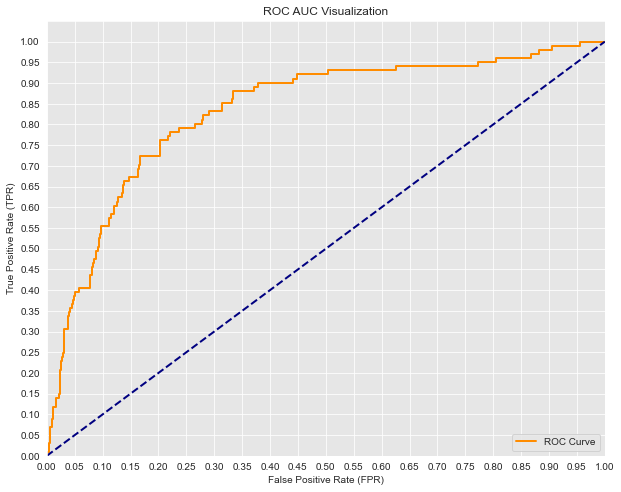

In [271]:
sns.set_style("darkgrid", {'axes.facecolor':'0.9'})
plt.figure(figsize=(10,8))
lw =2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC Curve')
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks([i/20.0 for i in range (21)])
plt.yticks([i/20.0 for i in range (21)])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC AUC Visualization')
plt.legend(loc="lower right")
plt.show()

#### Cross Validation Test
We shall evaluate the expected accuracy of our baseline and iterative model, prior to using the test data with `cv` of 5

In [267]:
#Cross Validation On Baseline Model
cv_scores_baseline = cross_val_score(baseline_model, X_train_final, y_train, cv=5)
print(f"Baseline cv score: {cv_scores_baseline.mean()}")
#Cross Validation On Iterative Model
print('\n')
cv_scores_iterative = cross_val_score(iterative_model, X_train_final, y_train, cv=5)
print(f"Iterative cv score: {cv_scores_iterative.mean()}")

Baseline cv score: 0.861215225808265


Iterative cv score: 0.861215225808265


* The Cross-Validation Mean Score of 86.12% is similar for both the baseline and iterative model.

* The iterative model appears to be performing better overall, especially in terms of generalization, as indicated by the cross-validation mean score of 86.12%. This score shows that our iterative model generalizes well across different subsets of data.

#### Decision Trees
Other than Logistic Regression, we shall try another model using Decision Trees. Decision trees are a powerful and flexible tool for classification problems, offering ease of interpretation, handling non-linear relationships, and providing automatic feature selection.

In [234]:
# #Instantiate the model
# clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
# #Fit the model
# clf.fit(X_train_final, y_train)
# #To predict
# y_hat_train = clf.predict(X_train_final)

#Calculate the classification metrics
# model_accuracy = accuracy_score(y_train, y_hat_train) *100
# model_recall = recall_score(y_train, y_hat_train) *100
# model_precision = precision_score(y_train, y_hat_train) *100
# model_f1 = f1_score(y_train, y_hat_train) *100
# #print the metrics
# print(f'Training Accuracy: {model_accuracy}')
# print(f'Training Recall: {model_recall}')
# print(f'Training Precision: {model_precision}')
# print(f'Training F1_score: {model_f1}')

# #Predict the y_trained data from the X_trained final set
# y_hat_test = clf.predict(X_test_final)
# #Calculate the classification metrics
# model_accuracy = accuracy_score(y_test, y_hat_test) *100
# model_recall = recall_score(y_test, y_hat_test) *100
# model_precision = precision_score(y_test, y_hat_test) *100
# model_f1 = f1_score(y_test, y_hat_test) *100
# print('/n')
# #print the metrics
# print(f'Testing Accuracy: {model_accuracy}')
# print(f'Testing Recall: {model_recall}')
# print(f'Testing Precision: {model_precision}')
# print(f'Testing F1_score: {model_f1}')


Training Accuracy: 100.0
Training Recall: 100.0
Training Precision: 100.0
Training F1_score: 100.0
/n
Testing Accuracy: 90.55472263868066
Testing Recall: 69.3069306930693
Testing Precision: 68.62745098039215
Testing F1_score: 68.96551724137932
